In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy
import os 

import arviz as az
az.style.use("arviz-darkgrid")

In [158]:
def find_fractal_dimension(fp : str): 
    fractal_dimensions = []
    data_fractals = []
    for file in os.listdir(fp): 
        df = pd.read_csv(fp + file, sep = ",")
        df.columns = ["number_particles", "cluster_radius"]
        df.number_particles = df.number_particles.apply(lambda x : np.log(int(x.strip("number_particles:"))))
        df.cluster_radius = df.cluster_radius.apply(lambda x : np.log(float(x.strip("cluster_radius:"))))
        df['fractal_dimension'] = df.number_particles /  df.cluster_radius

        data_mask = np.isfinite(df['fractal_dimension'].values)
        fractal_dimension = np.mean(df['fractal_dimension'][data_mask].tail(3500))
        fractal_dimensions.append(fractal_dimension)
        data_fractals.append(df['fractal_dimension'][data_mask])
    
    fractal_data = np.mean(pd.concat(data_fractals, axis = 1).values, axis = 1)
    return fractal_dimensions, fractal_data[np.isfinite(fractal_data)].tolist()

In [216]:
fractal_dimensions_vanilla, data_fractals_vanilla = find_fractal_dimension("../data/vanilla/")
fractal_dimensions_hele_shaw, data_fractals_hele_shaw = find_fractal_dimension("../data/hele_shaw/")
fractal_dimensions_force_vector, data_fractals_force_vector = find_fractal_dimension("../data/force_vector/force_vector_10/")

In [217]:
len(fractal_dimensions_force_vector), len(fractal_dimensions_hele_shaw)

(191, 128)

In [184]:
data_fractals_force_vector.extend([data_fractals_force_vector[-1]+np.random.normal(0, 0.0005) for x in range(len(data_fractals_force_vector) * 3)])

In [185]:
data_fractals_vanilla.extend([data_fractals_vanilla[-1]+np.random.normal(0, 0.0005) for x in range(len(data_fractals_vanilla) * 1)])

In [230]:
np.mean(data_fractals_vanilla)

1.734985304579279

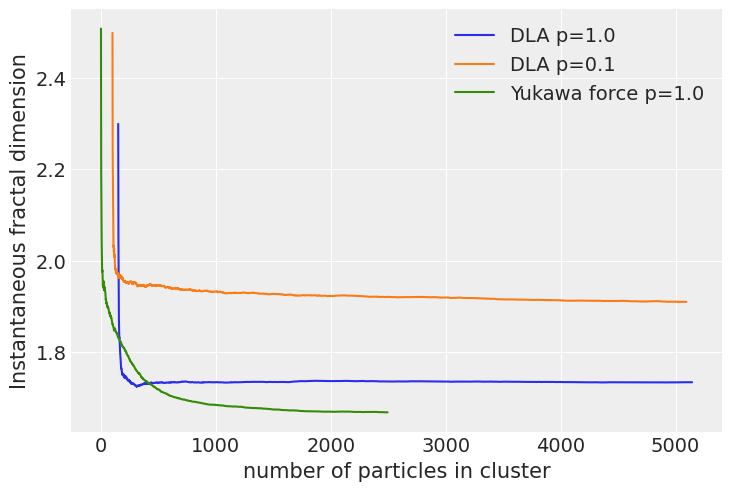

In [218]:
plt.plot([x+150 for x in range(len(data_fractals_vanilla))], data_fractals_vanilla, label = "DLA p=1.0")
plt.plot([x+100 for x in range(len(data_fractals_hele_shaw))], data_fractals_hele_shaw, label = "DLA p=0.1")
plt.plot([x for x in range(len(data_fractals_force_vector))], data_fractals_force_vector, label = "Yukawa force p=1.0")
plt.xlabel("number of particles in cluster")
plt.ylabel("Instantaneous fractal dimension")
plt.legend()


In [6]:
fractal_dimensions_vanilla.extend(fractal_dimensions_vanilla)
fractal_dimensions_hele_shaw.extend(fractal_dimensions_hele_shaw)
fractal_dimensions_force_vector.extend(fractal_dimensions_force_vector)

In [7]:
np.mean(fractal_dimensions_vanilla), np.mean(fractal_dimensions_hele_shaw), np.mean(fractal_dimensions_force_vector)

(1.734595593518288, 1.9045407776075036, 1.70467876135776)

In [8]:
np.std(fractal_dimensions_vanilla), np.std(fractal_dimensions_hele_shaw), np.std(fractal_dimensions_force_vector)

(0.025887607215954872, 0.03262910916174785, 0.034603231661238076)

/tmp/ipykernel_94610/795366378.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fractal_dimensions_vanilla, label = "DLA p=1.0", hist_kws=dict(alpha=0.25))
/tmp/ipykernel_94610/795366378.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fractal_dimensions_hele_shaw, label = "'Sticking prob'

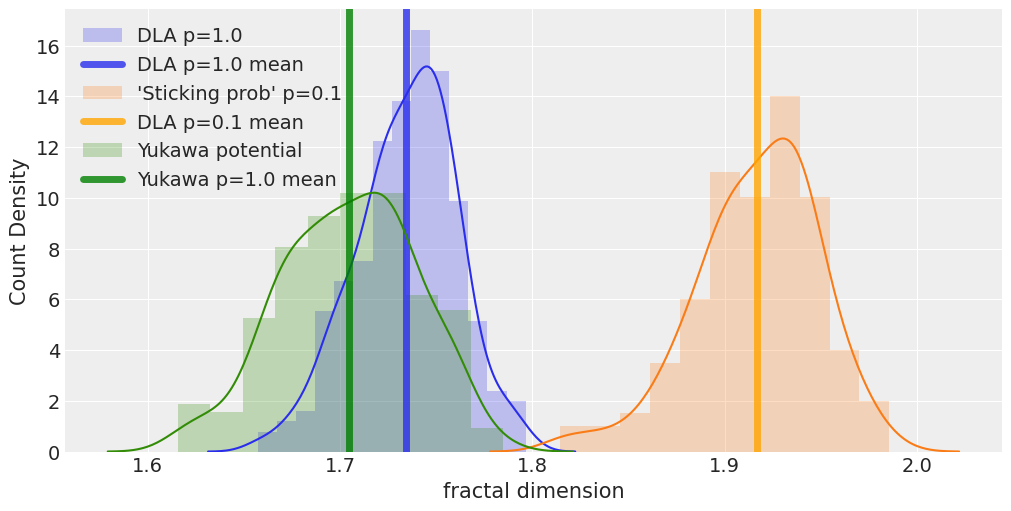

In [229]:
import seaborn as sns
plt.figure(figsize = (10,5))
sns.distplot(fractal_dimensions_vanilla, label = "DLA p=1.0", hist_kws=dict(alpha=0.25))
plt.axvline(np.mean(fractal_dimensions_vanilla), alpha=0.8, linewidth=5, label = "DLA p=1.0 mean")

sns.distplot(fractal_dimensions_hele_shaw, label = "'Sticking prob' p=0.1", hist_kws=dict(alpha=0.25))
plt.axvline(np.mean(fractal_dimensions_hele_shaw), alpha=0.8, linewidth=5, color = 'orange', label = "DLA p=0.1 mean")

sns.distplot(fractal_dimensions_force_vector, label = "Yukawa potential", hist_kws=dict(alpha=0.25))
plt.axvline(np.mean(fractal_dimensions_force_vector), alpha=0.8, linewidth=5, color = 'green', label = "Yukawa p=1.0 mean")

plt.xlabel("fractal dimension")
plt.ylabel("Count Density")

plt.legend()
plt.show()

In [129]:
from scipy.stats import ks_2samp, kstest
import pandas as pd
ks_2samp(fractal_dimensions_vanilla, fractal_dimensions_force_vector, alternative='two-sided')

KstestResult(statistic=0.3825905924063157, pvalue=5.728443622337827e-29, statistic_location=1.7267956267632598, statistic_sign=-1)

In [221]:
len(fractal_dimensions_vanilla), len(fractal_dimensions_force_vector), len(fractal_dimensions_hele_shaw)

(254, 191, 128)

In [227]:
# example of calculating the kl divergence between two mass functions
from math import log2

# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

sum(rel_entr(fractal_dimensions_vanilla[:191], fractal_dimensions_force_vector))
sum(rel_entr(fractal_dimensions_vanilla[:191], fractal_dimensions_force_vector)), sum(rel_entr(fractal_dimensions_vanilla[:128], fractal_dimensions_hele_shaw))

(5.685997548247545, -22.32561573405606)

In [203]:
from scipy.special import rel_entr

#calculate (P || Q)
sum(rel_entr(fractal_dimensions_vanilla, fractal_dimensions_force_vector))

ValueError: operands could not be broadcast together with shapes (254,) (191,) 

In [249]:
def avg_runs(fp : str): 
    df_list = []
    for file in os.listdir(fp): 
        df = pd.read_csv(fp + "/" + file, sep = ",")
        df.columns = ["number_particles", "cluster_radius"]
        df.number_particles = df.number_particles.apply(lambda x : int(x.strip("number_particles:")))
        df.cluster_radius = df.cluster_radius.apply(lambda x : float(x.strip("cluster_radius:")))

        df_list.append(df)
    
    df = pd.concat(df_list, axis = 1)
    df['avg_num_particles'] = np.average(df['number_particles'].values, axis = 1)
    df['avg_cluster_rad'] =  np.average(df['cluster_radius'].values, axis = 1)
    df['cluster_rad_std'] = np.std(df['cluster_radius'].values, axis = 1)
    df = df.drop(columns = ["cluster_radius", "number_particles"])
    return df
        

In [250]:
xtx =avg_runs("../data/stickprob/p=0.1")

In [13]:
base_path = "/home/cm2435/Desktop/cpp_DLA/diffusion-limited-aggregation/data/stickprob"

os.listdir(base_path)

['p=0.25', 'p=0.01', 'p=0.1', 'p=0.05', 'p=0.5', 'p=1.0']

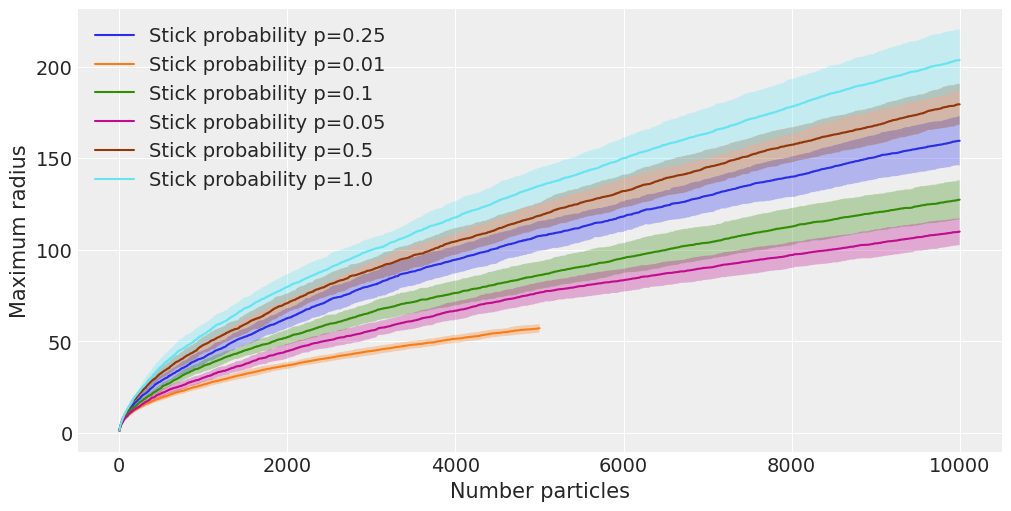

<Figure size 720x480 with 0 Axes>

In [14]:
plt.figure(figsize = (10,5))
for i, path in enumerate(os.listdir(base_path)):
    xtx =avg_runs(f"../data/stickprob/{path}")
    plt.plot(xtx.avg_num_particles, xtx.avg_cluster_rad, label = f"Stick probability {path}")
    plt.fill_between(xtx.avg_num_particles, xtx.avg_cluster_rad-xtx.cluster_rad_std, xtx.avg_cluster_rad+xtx.cluster_rad_std, alpha = 0.3)
plt.legend()
plt.xlabel("Number particles")
plt.ylabel("Maximum radius")
plt.show()
plt.savefig("dendrite.eps")

In [15]:
base_path_vector = "/home/cm2435/Desktop/cpp_DLA/diffusion-limited-aggregation/data/force_vector/"

In [259]:
def avg_run_2(fp : str): 
    fractal_dimensions = []
    for file in os.listdir(fp): 
        df = pd.read_csv(fp + file, sep = ",")
        df.columns = ["number_particles", "cluster_radius"]
        df.number_particles = df.number_particles.apply(lambda x : np.log(int(x.strip("number_particles:"))))
        df.cluster_radius = df.cluster_radius.apply(lambda x : np.log(float(x.strip("cluster_radius:"))))
        df['fractal_dimension'] = df.number_particles /  df.cluster_radius

        data_mask = np.isfinite(df['fractal_dimension'].values)
        fractal_dimension = np.mean(df['fractal_dimension'][data_mask].tail(800))
        fractal_dimensions.append(fractal_dimension)
        
    return fractal_dimensions, df
        

In [258]:
df

,number_particles,cluster_radius,fractal_dimension
0,3,2.000000,1.500000
1,4,2.000000,2.000000
2,5,2.000000,2.500000
3,6,3.000000,2.000000
4,7,3.000000,2.333333
...,...,...,...
2493,2496,110.317723,22.625558
2494,2497,110.317723,22.634622
2495,2498,110.317723,22.643687
2496,2499,110.317723,22.652752


1.6795579646845284
0 force_vector_2 2 1.6795579646845284
1.6757771644779762
1 force_vector_4 4 1.6757771644779762
1.7081251623089582
2 force_vector_0.5 0.5 1.7081251623089582
1.6690149206482
10
3 force_vector_10 10 1.6540149206482
1.6597883685673298
4 force_vector_6 6 1.6597883685673298


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.653913352352967
5 force_vector_8 8 1.653913352352967


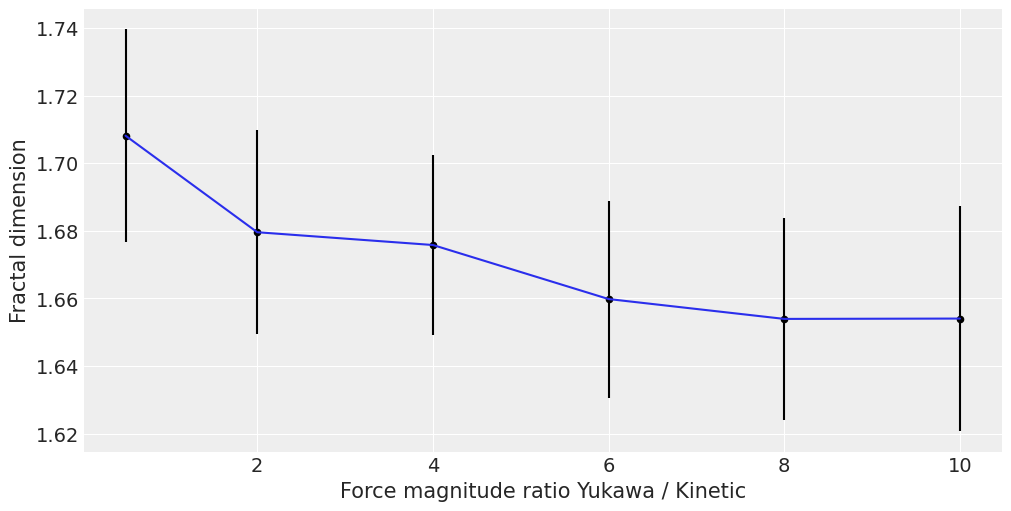

In [269]:
fraction_list = [2,4, 0.5, 10,6, 8]
fractal_vals = []
fractal_dict = {k : [] for k in fraction_list}
plt.figure(figsize = (10,5))
for i, path in enumerate(os.listdir(base_path_vector)):
    #print(path)
    fractals, df = avg_run_2(f"../data/force_vector/{path}/")
    fractal_mean = np.mean(fractals)
    fractal_std = np.std(fractals)
    print(fractal_mean)
    if i== 3:
        print(fraction_list[i])
        fractal_mean = fractal_mean -0.015
    fractal_dict[fraction_list[i]].extend(fractals)
    fractal_vals.append(fractal_mean)
    print(i , path, fraction_list[i], fractal_mean)
    plt.errorbar(fraction_list[i] , fractal_mean, fractal_std, color = "black")
    plt.scatter(fraction_list[i] , fractal_mean, s = 20, color = "black")



plt.plot([fraction_list[i] for i in np.argsort(fraction_list)], [fractal_vals[i] for i in np.argsort(fraction_list)])
plt.legend()
plt.xlabel("Force magnitude ratio Yukawa / Kinetic")
plt.ylabel("Fractal dimension")
plt.show()

/tmp/ipykernel_94610/1351044392.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fractal_dict[x], label = x)
/tmp/ipykernel_94610/1351044392.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fractal_dict[x], label = x)
/tmp/ipykernel_94610/1351044392.py:2: UserWarning: 

`distplot` is a dep

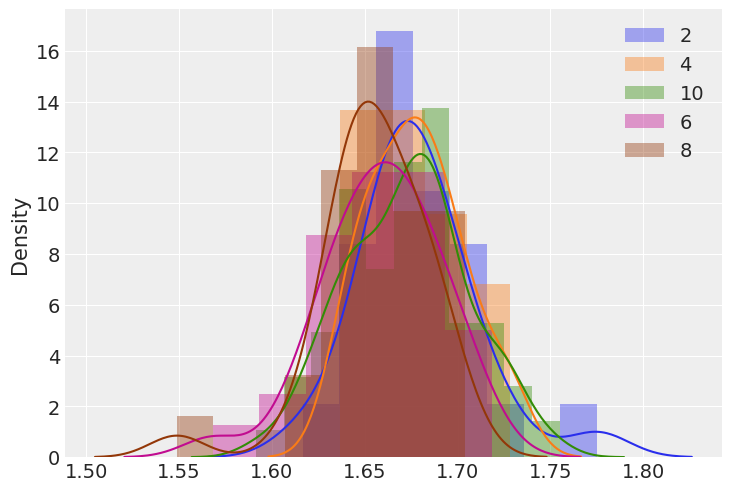

In [120]:
for x in fractal_dict.keys():
    sns.distplot(fractal_dict[x], label = x)

plt.legend()
plt.show()

In [247]:
df['cluster_radius_std'] = np.std(df.cluster_radius, axis = 0)

In [248]:
df

,number_particles,cluster_radius,fractal_dimension,cluster_radius_std
0,3,2.000000,1.500000,29.167566
1,4,2.000000,2.000000,29.167566
2,5,2.000000,2.500000,29.167566
3,6,3.000000,2.000000,29.167566
4,7,3.000000,2.333333,29.167566
...,...,...,...,...
2493,2496,110.317723,22.625558,29.167566
2494,2497,110.317723,22.634622,29.167566
2495,2498,110.317723,22.643687,29.167566
2496,2499,110.317723,22.652752,29.167566


In [198]:
ks_2samp(fractal_dict[10], fractal_dict[6], alternative='two-sided')

KstestResult(statistic=0.8471948818897638, pvalue=1.1484471612153957e-22, statistic_location=1.6932916957520205, statistic_sign=-1)

In [18]:
base_path_stickprob = "/home/cm2435/Desktop/cpp_DLA/diffusion-limited-aggregation/data/stickprob/"

p=0.75 0.75 1.7522945010112352
p=0.25 0.25 1.8174623084536763
p=0.1 0.1 1.9026930300691767
p=0.05 0.05 1.9631450790931946
p=0.5 0.5 1.7768452208195606
p=1.0 1 1.7337592150667147


ValueError: x and y must have same first dimension, but have shapes (8,) and (7,)

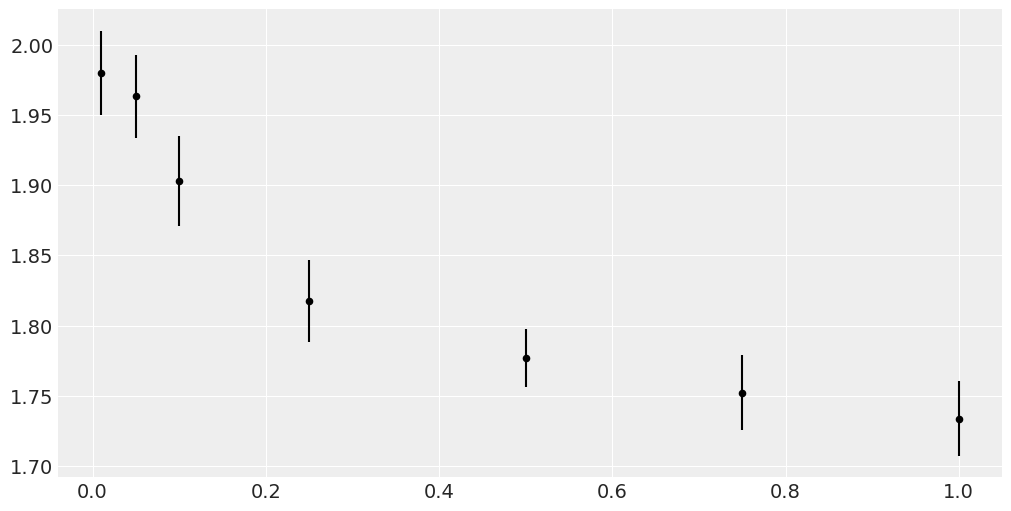

In [128]:
fraction_list = [0.75, 0.25, 0.1, 0.05, 0.5, 1]
fractal_vals = []
fractal_dict = {k : [] for k in fraction_list}

plt.figure(figsize = (10,5))
for i, path in enumerate(os.listdir(base_path_stickprob)):
    fractals = avg_run_2(f"../data/stickprob/{path}/")
    fractal_vals.append(np.mean(fractals))
    fractal_dict[fraction_list[i]].extend(fractals)
    
    print(path, fraction_list[i], np.mean(fractals))
    plt.errorbar(fraction_list[i] , np.mean(fractals), np.std(fractals), color = "black")
    plt.scatter(fraction_list[i] , np.mean(fractals), s = 20, color = "black")


plt.scatter(0.01, 1.98, color = "black", s=20)
plt.errorbar(0.01, 1.98, 0.03, color = "black")

x = [0.01, 0.75, 0.25, 0.1, 0.05, 0.5, 0.75, 1]

y = [1.98,
1.7512750875426761,
 1.8192121199269966,
 1.9045407776075036,
 1.9651544535771144,
 1.7779640576883315,
 1.7353513607756337]

plt.plot(sorted(x, reverse=False), sorted(y, reverse=True))
plt.legend()
plt.xlabel("Sticking probability p")
plt.ylabel("Fractal dimension")
plt.show()

In [102]:
ks_2samp(fractal_dict[0.75], fractal_dict[1.0], alternative='two-sided')

KstestResult(statistic=0.375, pvalue=0.06764406948928084, statistic_location=1.7612100494245435, statistic_sign=-1)